In [ ]:
!pip install statsmodela

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the data from CSV
file_path = 'data/temp_data.csv'  # Update with your file path
data = pd.read_csv(file_path, parse_dates=['Date'])

# Count headlines per day
daily_headlines = data.groupby('Date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'Date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('Date', inplace=True)




In [2]:
print(time_series_data)

            Headlines_Count
Date                       
2023-07-02                1
2023-07-04                1
2023-07-05                1
2023-07-07                1
2023-07-09                1
2023-07-10                4
2023-07-11                1
2023-07-12                4
2023-07-13                1
2023-07-14                1
2023-07-18                1
2023-07-19                3


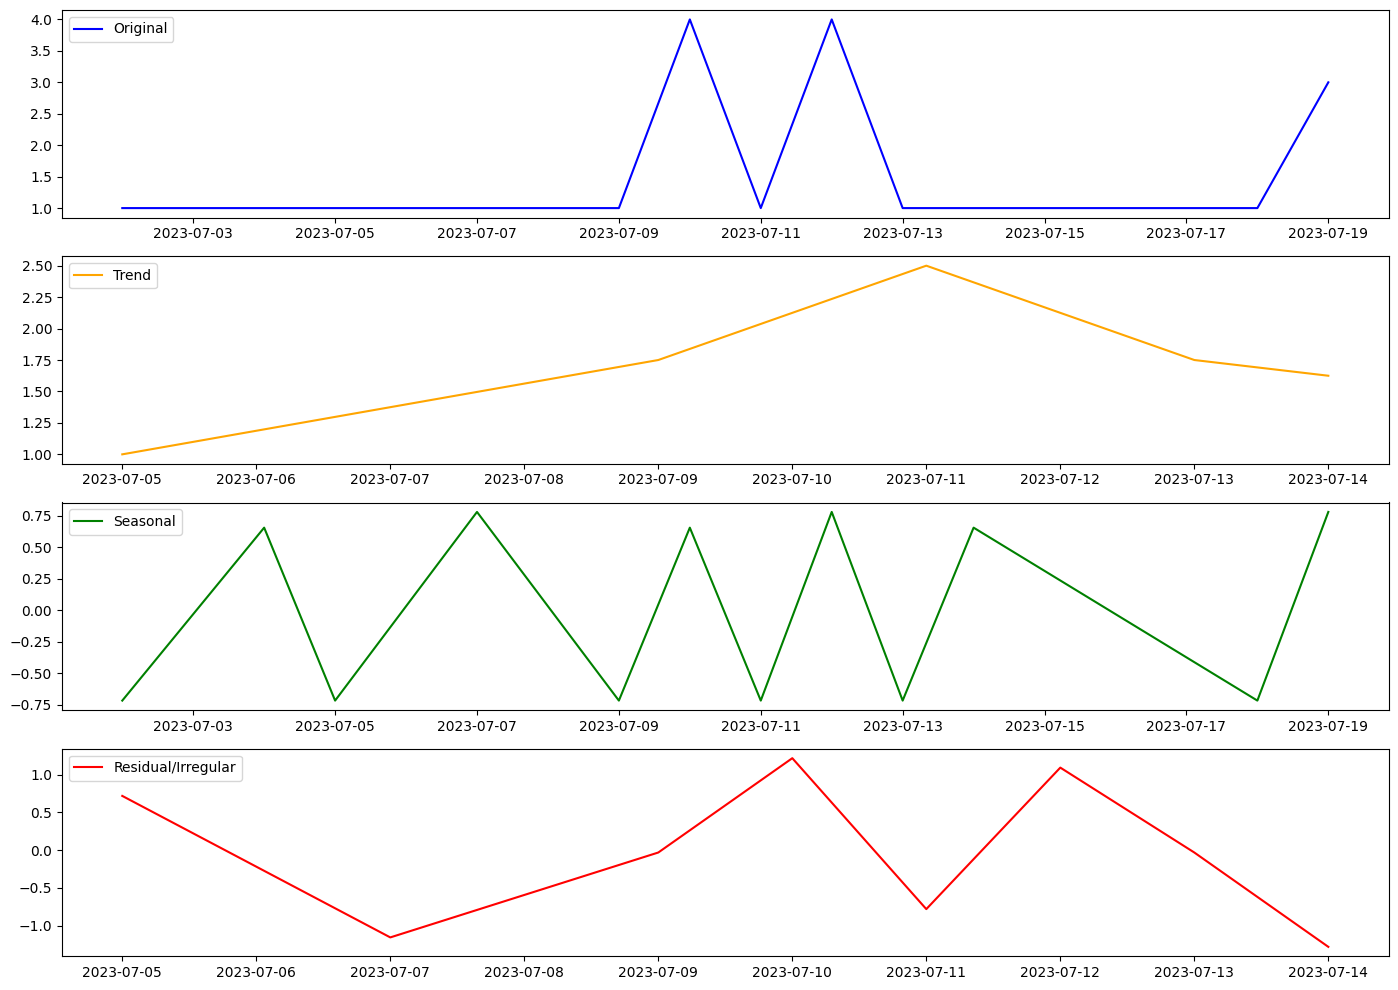

In [ ]:
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=4)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()